# Capstone Project: Predictive Modelling For Coronary Heart Disease (CHD) Using Support Vector Machines (SVM) #

**Bobby Rahman** | 
**Professional Certificate in Data Analytics** |
**Imperial College and Emeritus**

# Project Overview: # 

This project delves into understanding the complex interplay between age, gender, and the likelihood of Coronary Heart Disease (CHD) development. The central hypothesis posits that age and gender significantly influence an individual's susceptibility to CHD, with older men facing a higher risk compared to younger individuals and women. Leveraging advanced data analysis techniques, including predictive modelling, the aim is to empirically validate this hypothesis. The success criterion for the predictive model is an accuracy rate surpassing 70%, providing a foundational benchmark for CHD prediction. By focusing on age and gender as pivotal determinants, this project seeks to inform tailored interventions and enhance preventive strategies for CHD.


# Data Loading and Initial Inspection #

### Objective: Load the dataset into a DataFrame and perform initial inspection to ensure data integrity.

In this step, the heart disease dataset was loaded from a CSV file into a Pandas DataFrame named df. Several initial inspection tasks were conducted to understand the dataset's structure, identify potential issues, and prepare it for further analysis. Tasks included checking for missing values using df.isnull().sum(), examining data types of columns using df.dtypes, and generating descriptive statistics for numerical features using df.describe(). Additionally, the first few rows of the dataset were inspected using df.head() to get a glimpse of its contents and format. These preliminary steps facilitated an assessment of the data quality and informed subsequent preprocessing decisions.


In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [201]:
df = pd.read_csv(r"C:\Users\bobby\OneDrive\Desktop\Data Analytics Imperial\Project Data\heart_data_project.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory Data Analysis (EDA) #

### Objective: To explore the dataset to understand the dataset's characteristics, identify patterns, and uncover insights that may inform subsequent analysis.

EDA is an important step in the data analysis process for this project, allowing for a deeper understanding of the dataset and its underlying structure. During the EDA process, various techniques and visualisations are employed to investigate relationships between variables, detect outliers, and assess distributions. This process involves generating summary statistics, visualising data distributions using histograms, box plots, and scatter plots, and examining correlations between features using correlation matrices. 

In [202]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [203]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [204]:
print("Column names:")
print(df.columns)

print("\nData types:")
print(df.dtypes)

Column names:
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Data types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [205]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [206]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

## Data Visualisation ##
The next step of the EDA was to analyse data using visualisation methods such as graphs.

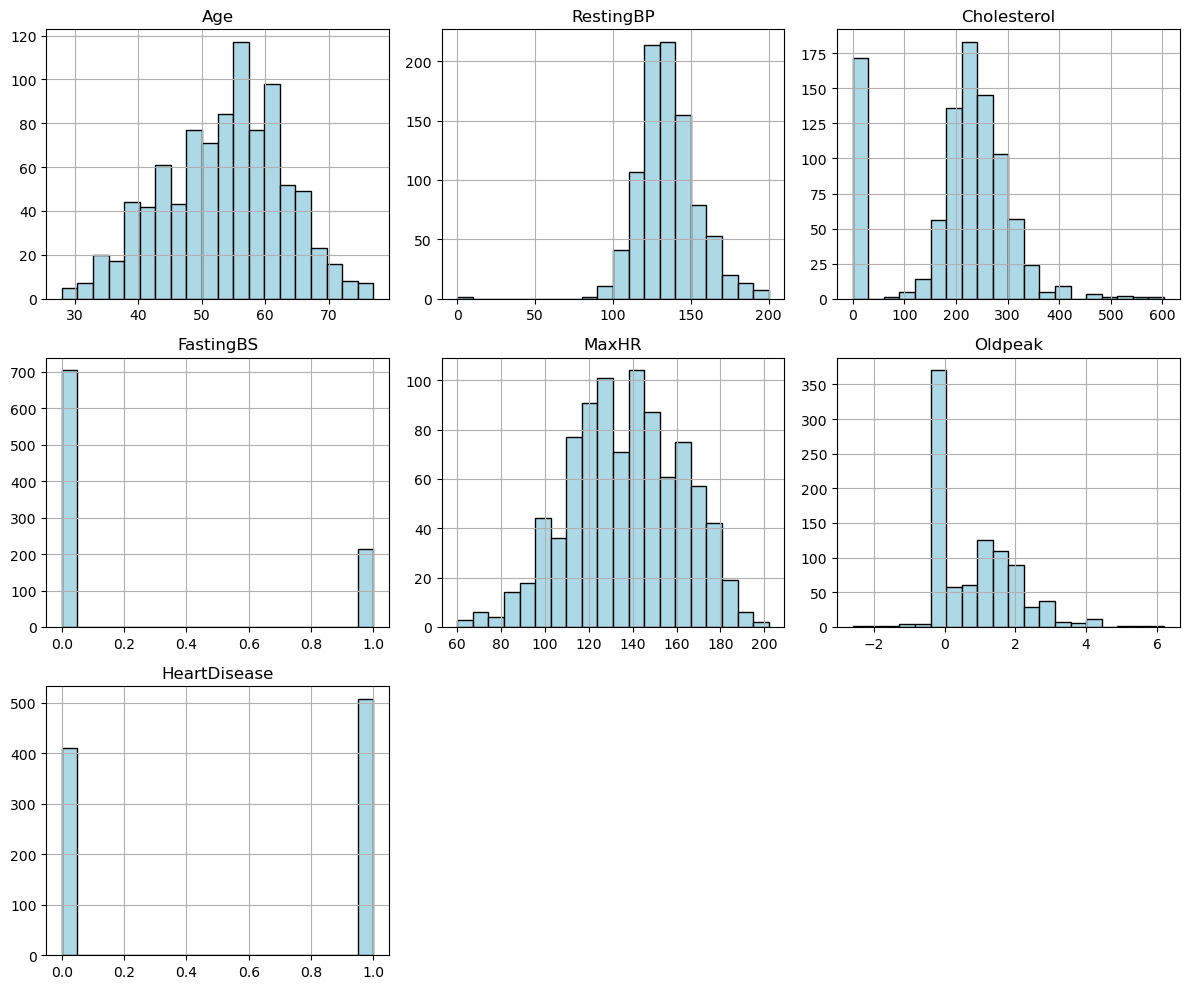

In [207]:
df.hist(figsize=(12, 10), bins=20, color='lightblue', edgecolor='black')
plt.tight_layout()
plt.show()

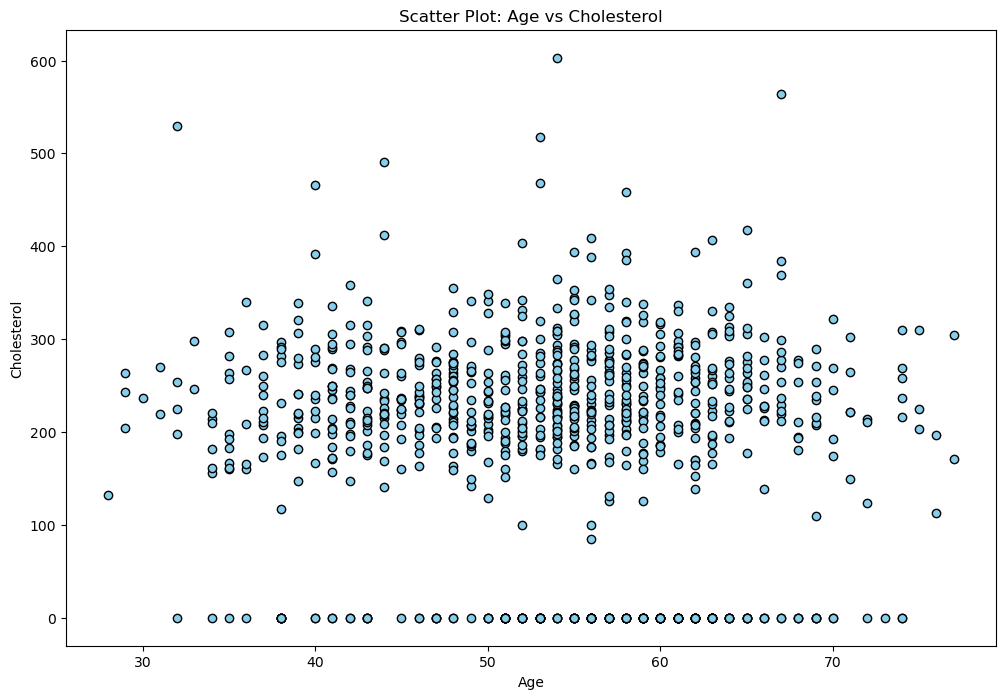

In [208]:
plt.figure(figsize=(12, 8))

plt.scatter(df['Age'], df['Cholesterol'], color='skyblue', edgecolor='black')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

plt.show()

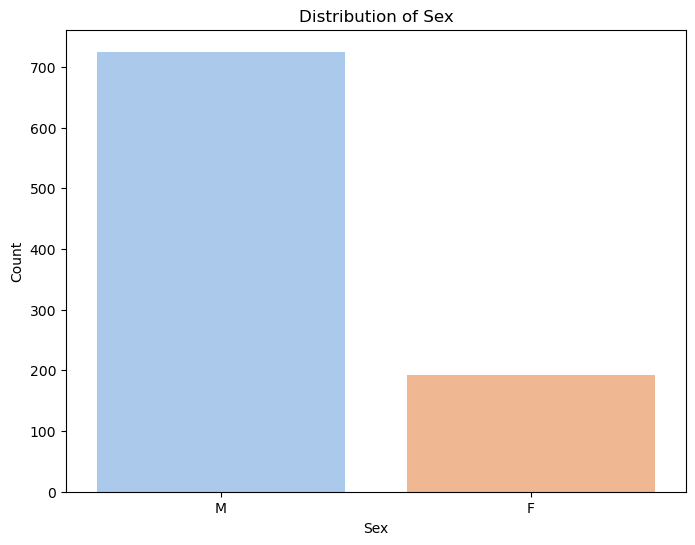

In [209]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

The code below is to see the number representation of the plot above (Distribution of Sex)

In [210]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

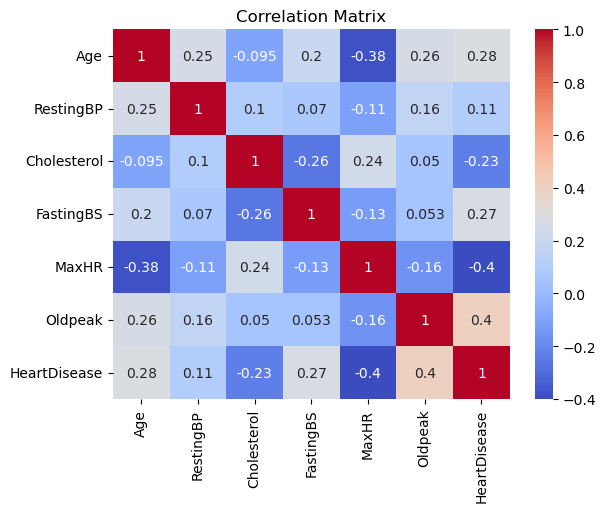

In [211]:
import seaborn as sns
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

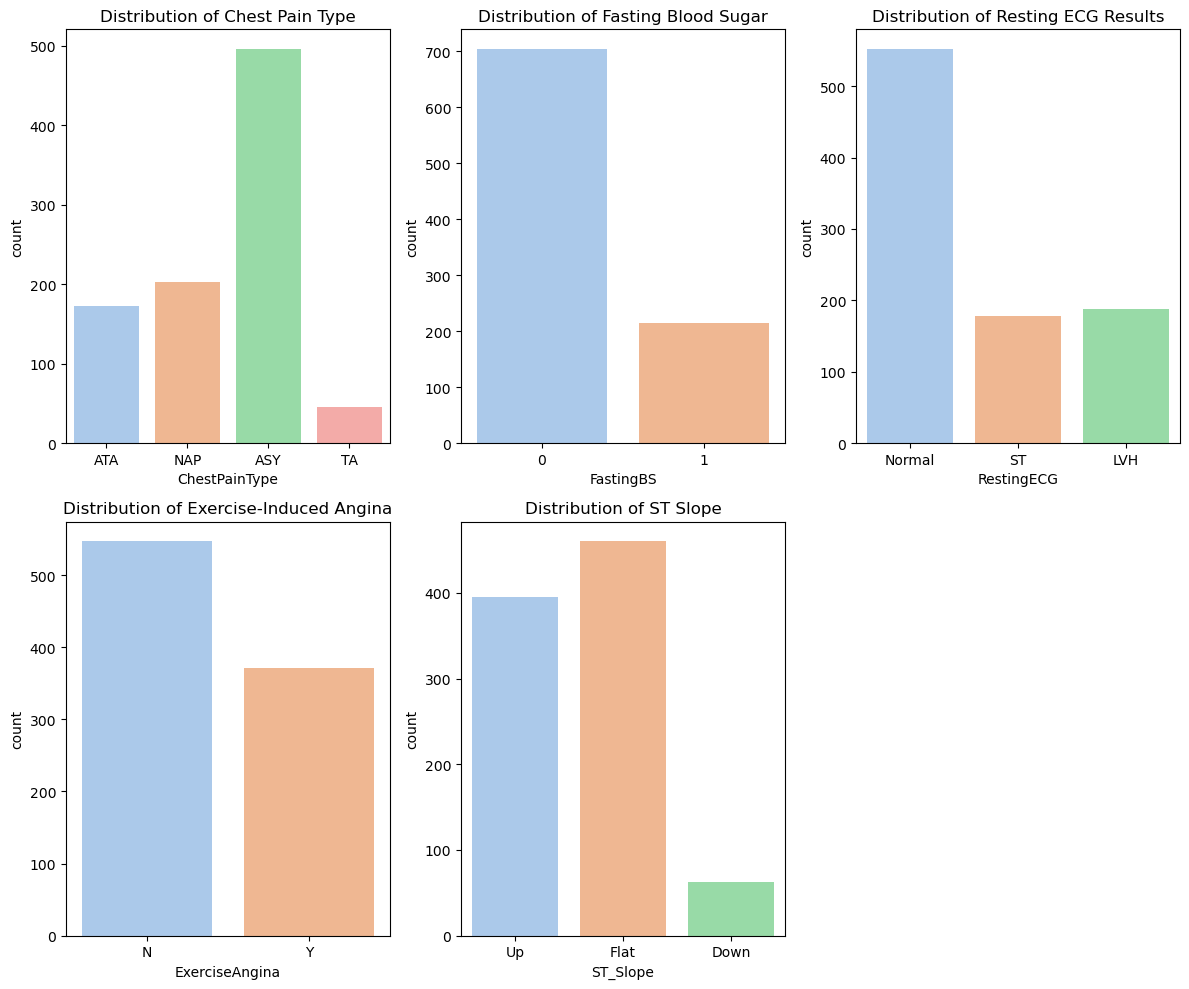

In [212]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='ChestPainType', data=df, palette='pastel')
plt.title('Distribution of Chest Pain Type')

plt.subplot(2, 3, 2)
sns.countplot(x='FastingBS', data=df, palette='pastel')
plt.title('Distribution of Fasting Blood Sugar')

plt.subplot(2, 3, 3)
sns.countplot(x='RestingECG', data=df, palette='pastel')
plt.title('Distribution of Resting ECG Results')

plt.subplot(2, 3, 4)
sns.countplot(x='ExerciseAngina', data=df, palette='pastel')
plt.title('Distribution of Exercise-Induced Angina')

plt.subplot(2, 3, 5)
sns.countplot(x='ST_Slope', data=df, palette='pastel')
plt.title('Distribution of ST Slope')

plt.tight_layout()
plt.show()

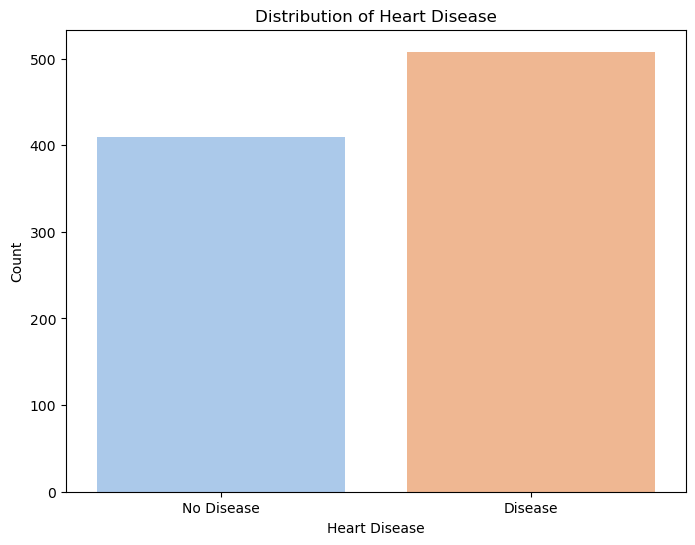

In [213]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df, palette='pastel')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

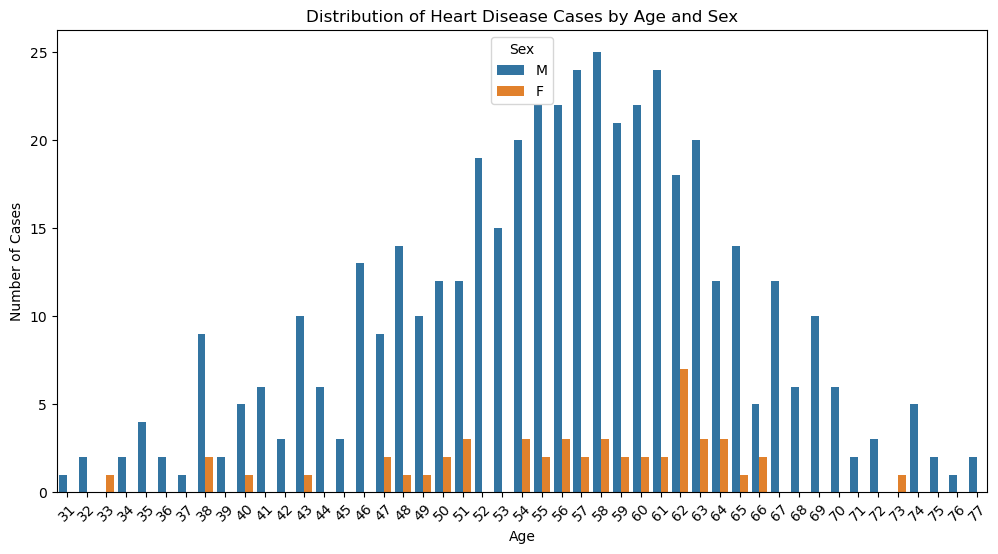

In [214]:
heart_disease_data = df[df['HeartDisease'] == 1]

grouped_data = heart_disease_data.groupby(['Age', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Count', hue='Sex', data=grouped_data)
plt.title('Distribution of Heart Disease Cases by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

The Distrubition of heart disease case by age and sex bar plot is invaluable as it is line with the hypothesis, which is that age and gender significantly influence the likelihood of developing heart disease within the dataset, with older males being more susceptible compared to younger individuals and females.

# Predictive Modelling using SVM #

## Model Training ##

The following code trains a Support Vector Machine (SVM) classifier using the heart project dataset. It includes steps for data preprocessing, feature encoding, model initialisation, training, prediction, and evaluation.


This section separates the features (X) from the target variable (Y) in the dataset.

In [216]:
# Features 
X = df.drop(columns=['HeartDisease']) 

# Target Variable
Y = df['HeartDisease'] 

Then the dataset is divided into training and testing sets using a 70-30 split ratio. The inclusion of the random_state parameter guarantees reproducibility.

In [217]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

This is then followed by the next part, which performs one-hot encoding on categorical variables in both the training and testing sets to convert them into a format suitable for machine learning algorithms.

In [218]:
# One-hot coding 
X_train_encoded = pd.get_dummies(X_train)  # This one is for training features
X_test_encoded = pd.get_dummies(X_test) # This one is for testing features 

This next part is where a Support Vector Machine (SVM) classifier with a linear kernel is initialised and trained using the encoded training data.

In [219]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_encoded, Y_train)

SVC(kernel='linear', random_state=42)

Following the training phase, the presence of coronary heart disease (CHD) on the testing data is predicted using the trained classifier.

In [220]:
Y_pred = svm_classifier.predict(X_test_encoded)

Finally, the model's performance is evaluated using a confusion matrix and a classification report, offering insights into its predictive capabilities.

In [221]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Confusion Matrix:
 [[ 99  13]
 [ 22 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



## Model Performance Summary: ##
- Accuracy: 87%
- Precision (No Heart Disease): 82%
- Precision (Heart Disease): 92%
- Recall (No Heart Disease): 88%
- Recall (Heart Disease): 87%
- F1-score (No Heart Disease): 0.85
- F1-score (Heart Disease): 0.89

The model demonstrates strong performance with an accuracy of 87%, indicating its effectiveness in classifying individuals with and without heart disease. Precision and recall values further highlight its ability to correctly identify positive and negative cases, with balanced F1-scores indicating robustness in capturing underlying patterns. If deployed in the real word, the model could prove useful in aiding early intervention and risk management strategies for heart disease.


## Predictive Data Inspection ##

A further inspection was performed to visualise the predictive output alongside the dataset. The dataframe exhibits ten rows from the heart dataset, accompanied by the corresponding predictions. This serves as another means of evaluating the predictive modeling results.

In [222]:
df_with_predictions = X_test_encoded.copy()
df_with_predictions['Actual_HeartDisease'] = Y_test.values
df_with_predictions['Predicted_HeartDisease'] = Y_pred

print(df_with_predictions.head(10))

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
668   63        140          195          0    179      0.0      1      0   
30    53        145          518          0    130      0.0      0      1   
377   65        160            0          1    122      1.2      0      1   
535   56        130            0          0    122      1.0      0      1   
807   54        108          309          0    156      0.0      0      1   
793   67        125          254          1    163      0.2      0      1   
363   56        120            0          0    148      0.0      0      1   
583   69        142          271          0    126      0.3      0      1   
165   46        140          272          1    175      2.0      0      1   
483   58        120            0          0    106      1.5      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ...  RestingECG_LVH  \
668                  0                  1  ...               0   
30                  

In [223]:
print(df_with_predictions.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Actual_HeartDisease', 'Predicted_HeartDisease'],
      dtype='object')


Comparing the actual data with the predictive

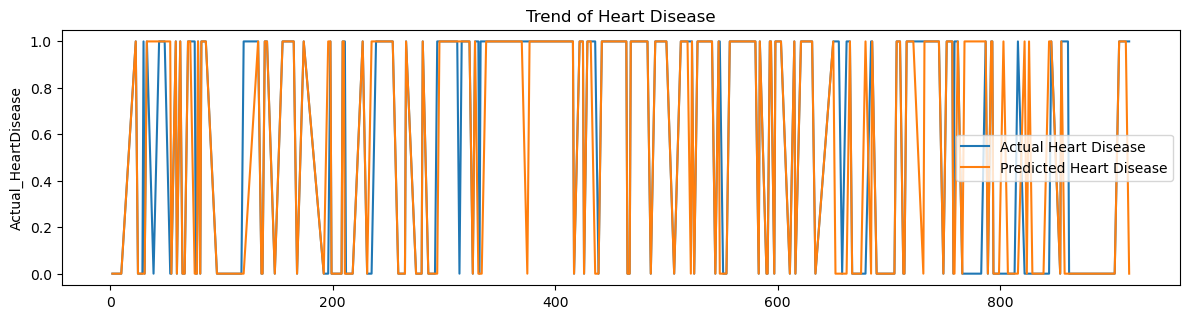

In [227]:
df_trends = df_with_predictions[['Actual_HeartDisease', 'Predicted_HeartDisease']]

plt.figure(figsize=(12, 6))

# Plot for Heart Disease (Actual and Predicted)
plt.subplot(2, 1, 2)
sns.lineplot(data=df_trends, x=df_trends.index, y='Actual_HeartDisease', label='Actual Heart Disease')
sns.lineplot(data=df_trends, x=df_trends.index, y='Predicted_HeartDisease', label='Predicted Heart Disease')
plt.title('Trend of Heart Disease')

plt.tight_layout()
plt.show()

#### Predictive Output vs Actual Output ####

The generated line plot illustrates a comparison between the trends of actual and predicted heart disease cases. Observing the plot, it's evident that the predicted heart disease cases closely mirror the actual outcomes, albeit with slight deviations. Despite these minor differences, the accuracy of the predictive model remains commendably close to the actual heart disease occurrences. This alignment between predicted and actual trends not only signifies the model's effectiveness in estimating heart disease cases but also reinforces the hypothesis that age and gender play significant roles in determining susceptibility to CHD. The close resemblance between predicted and actual trends further supports the notion that older men are at a higher risk of CHD, aligning with the hypothesis.

# Project Conclusion 

In summary, this project represents a significant milestone for me in the journey into predictive modelling using Python. It involved loading, exploring, and preparing the dataset, followed by the creation and evaluation of a predictive model for heart disease. Throughout the process, valuable insights and hands-on experience were gained in various aspects of data science.

Exploratory data analysis (EDA) provided insights into the dataset's characteristics and relationships between variables. Visualisations such as histograms, scatter plots, and correlation matrices helped understand data distribution and patterns. The construction of the predictive model, leveraging techniques like one-hot encoding and support vector machines (SVM), demonstrated the practical application of machine learning algorithms in healthcare analytics.

While the model achieved an accuracy of over 80%, specifically 87%, there are opportunities for improvement and future exploration. Fine-tuning model parameters, experimenting with different algorithms, and conducting feature engineering could enhance performance. Deploying the model in real-world settings and gathering feedback from domain experts would provide valuable insights for improvement.

As a novice in data science, the importance of continuous learning and refinement is recognised. This project has equipped me with foundational skills and confidence to tackle more complex challenges in the future. Reflecting on lessons learned, better preparation is gained for future projects in data science.
